In [1]:
#Import basic libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
#Import dataset
data2 =pd.read_csv(r"C:\LuLu\Machine Learning\ML ass 2\DataSet\income.csv",names = ['Age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'mstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hoursperweek', 'ncountry', 'income'])

#Take the first 10000 datasamples for this project
data2=data2.iloc[0:10000,:]


print(data2.shape)

#this dataset has 32562 data points and 15 features

#Missing value
data2.dropna(axis=0)





(10000, 15)


,Age,workclass,fnlwgt,education,educationnum,mstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,ncountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Feature Selection

In [3]:
data2=data2[['Age','educationnum','sex','race','hoursperweek','workclass','mstatus','ncountry','occupation','income']]

#data2['incomeN'] = np.where(data2['income']=='<=50K', 0, 1)

#df['color'] = np.where(df['Set']=='Z', 'green', 'red')


#data2

One Hot Encoding

In [4]:
#turn data into categorical
def categorical(column):
    data2[column]=pd.Categorical(data2[column])
    
#categorical('workclass')
#categorical("education")
categorical("sex")
#categorical("mstatus")
#categorical("occupation")
#categorical("relationship")
categorical("race")
#categorical("ncountry")
categorical("income")

#dummeies
dfDummies = pd.get_dummies(data2['workclass'], prefix = 'workclass')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['sex'], prefix = 'sex')
data2 = pd.concat([data2, dfDummies], axis=1)
    
#dfDummies = pd.get_dummies(data2['education'], prefix = 'education')
#data2 = pd.concat([data2, dfDummies], axis=1)


dfDummies = pd.get_dummies(data2['occupation'], prefix = 'occupation')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
#dfDummies = pd.get_dummies(data2['relationship'], prefix = 'relationship')
#data2 = pd.concat([data2, dfDummies], axis=1)        

dfDummies = pd.get_dummies(data2['race'], prefix = 'race')
data2 = pd.concat([data2, dfDummies], axis=1)

dfDummies = pd.get_dummies(data2['mstatus'], prefix = 'mstatus')
data2 = pd.concat([data2, dfDummies], axis=1)
                           
dfDummies = pd.get_dummies(data2['ncountry'], prefix ='ncountry')
data2 = pd.concat([data2, dfDummies], axis=1)

#dfDummies = pd.get_dummies(data2['income'], prefix = 'income')
#data2 = pd.concat([data2, dfDummies], axis=1)

data2.shape


(10000, 89)

Split data into train and test, x and y

In [5]:
#Extract features
y2=data2[['income']]      
x2=data2.drop("income",axis=1)
#x2=x2.drop("fnlwgt",axis=1)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y2)
encoded_Y = encoder.transform(y2)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

y2=dummy_y


#Split into train and test
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)


#
x_train2 = x_train2.drop(['sex','race','workclass','mstatus','ncountry','occupation'], axis=1)
x_test2 = x_test2.drop(['sex','race','workclass','mstatus','ncountry','occupation'], axis=1)

x_train2=np.asarray(x_train2)
x_test2=np.asarray(x_test2)


y_train2=np.asarray(y_train2)
y_test2=np.asarray(y_test2)

y_train2.shape
y_test2.shape


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2000, 2)

In [6]:
x_train2.shape

(8000, 82)

In [7]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.fit_transform(x_test2)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:

def cal_accuracy(y_test,y_pred):
    #print("Confusion Matrix:",
     #    confusion_matrix(y_test,y_pred))
    
    print("Accuracy :",
            accuracy_score(y_test,y_pred)*100)
    print("Error rate:",
             1-(accuracy_score(y_test,y_pred)))
    
    #print("Report:",
          #classification_report(y_test,y_pred))
    
    return 1-(accuracy_score(y_test,y_pred))

Artificial Neural Networks (ANN)

In [9]:
from keras import Sequential
from keras.layers import Dense

#I start with 2 hidden layers and 4 nodes
#ReLe will be the activiation function for hidden layer
#We will use sigmoid as activation function as it's a binary classfication problem
#node


def ann_hlayer_2(node,xtrain,ytrain,xtest,ytest):
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal',input_dim=82))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal'))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer='random_normal'))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=3)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

    #check accuracy
    #print ("Accuracy of Train when node is",node)
    #cal_accuracy(ytrain,y_pred_train)
    #print ("Accuracy of Test when node is ",node)
    #cal_accuracy(ytest,y_pred)
    
   # #confusion matrix
    #print ("CM of Train when node is",node)
    #confusion_matrix(
    #y_train2.values.argmax(axis=1), y_pred_train.argmax(axis=1))
    #print ("CM of Test when node is ",node)
    #confusion_matrix(
    #y_test2.values.argmax(axis=1), y_pred.argmax(axis=1))
    
    return y_pred_train,y_pred

In [10]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(8000, 82)
(8000, 2)
(2000, 82)
(2000, 2)


Experiments with number of nodes in hidden layers

In [11]:
random.seed(1)

p_ann_t_1,p_ann_1=ann_hlayer_2(1,x_train2,y_train2,x_test2,y_test2)

p_ann_t_10,p_ann_10=ann_hlayer_2(10,x_train2,y_train2,x_test2,y_test2)

p_ann_t_20,p_ann_20=ann_hlayer_2(20,x_train2,y_train2,x_test2,y_test2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
8000/8000 [==============================] - 1s 186us/step - loss: 0.5537 - acc: 0.7622
Epoch 2/3
8000/8000 [==============================] - 1s 97us/step - loss: 0.4395 - acc: 0.7626
Epoch 3/3
8000/8000 [==============================] - 1s 93us/step - loss: 0.4050 - acc: 0.7795
Epoch 1/3
8000/8000 [==============================] - 1s 177us/step - loss: 0.4595 - acc: 0.7836
Epoch 2/3
8000/8000 [==============================] - 1s 109us/step - loss: 0.3829 - acc: 0.8229
Epoch 3/3
8000/8000 [==============================] - 1s 101us/step - loss: 0.3747 - acc: 0.8235
Epoch 1/3
8000/8000 [==============================] - 1s 174us/step - loss: 0.4420 - acc: 0.7822
Epoch 2/3
8000/8000 [==============================] - 1s 108us/step - loss: 0.3861 - acc: 0.8221
Epoch 3/3
8000/8000 [==============================] - 1s 102us/step - loss: 0.3762 - acc: 0.8271


In [13]:
#Test error and Train Error

print ("Accuracy of Train of ann when nodes=1")
ann_t_1_e=cal_accuracy(y_train2,p_ann_t_1)
print ("Accuracy of Test of ann when nodes=1")
ann_1_e=cal_accuracy(y_test2,p_ann_1)

#Test error and Train Error

print ("Accuracy of Train of ann when nodes=10")
ann_t_10_e=cal_accuracy(y_train2,p_ann_t_10)
print ("Accuracy of Test of ann when nodes=10")
ann_10_e=cal_accuracy(y_test2,p_ann_10)
    
    
#Test error and Train Error

print ("Accuracy of Train of ann when nodes=20")
ann_t_20_e=cal_accuracy(y_train2,p_ann_t_20)
print ("Accuracy of Test of ann when nodes=20")
ann_20_e=cal_accuracy(y_test2,p_ann_20)


Accuracy of Train of ann when nodes=1
Accuracy : 76.2625
Error rate: 0.237375
Accuracy of Test of ann when nodes=1
Accuracy : 76.0
Error rate: 0.24
Accuracy of Train of ann when nodes=10
Accuracy : 82.6875
Error rate: 0.17312499999999997
Accuracy of Test of ann when nodes=10
Accuracy : 82.65
Error rate: 0.1735
Accuracy of Train of ann when nodes=20
Accuracy : 83.1375
Error rate: 0.16862500000000002
Accuracy of Test of ann when nodes=20
Accuracy : 83.1
Error rate: 0.16900000000000004


Learning Curve of ann nodes (number of neurons)

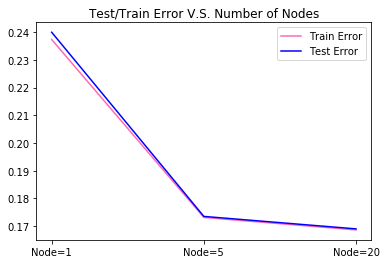

In [14]:
#Nodes learning curve
x=["Node=1","Node=5","Node=20"]

Test_Error=[ann_1_e,ann_10_e,ann_20_e]
Train_Error=[ann_t_1_e,ann_t_10_e,ann_t_20_e]
plt.plot( x, Train_Error, marker='',color='hotpink',label='Train Error')
plt.plot( x, Test_Error, marker='', color='blue', label='Test Error')
plt.title('Test/Train Error V.S. Number of Nodes')

plt.legend()

Experiments with Number of Layers

With 5 hidden layers

In [15]:
def ann_hlayer_5(node,xtrain,ytrain,xtest,ytest):
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal',input_dim=82))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal'))
    
    #Third Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal'))
                    
    #Forth hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal'))

    #Output Layer
    classifier.add(Dense(2,activation='sigmoid',
    kernel_initializer='random_normal'))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=10)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

    #check accuracy
    #print ("Accuracy of Train")
    #cal_accuracy(ytrain,y_pred_train)
    #print ("Accuracy of Test")
    #cal_accuracy(ytest,y_pred)
    
    return y_pred_train,y_pred

In [16]:
random.seed(2)

p_ann_t_layer_5_1,p_ann_layer_5_1=ann_hlayer_5(1,x_train2,y_train2,x_test2,y_test2)
p_ann_t_layer_5_10,p_ann_layer_5_10=ann_hlayer_5(10,x_train2,y_train2,x_test2,y_test2)
p_ann_t_layer_5_20,p_ann_layer_5_20=ann_hlayer_5(20,x_train2,y_train2,x_test2,y_test2)

Epoch 1/10
8000/8000 [==============================] - 2s 213us/step - loss: 0.6260 - acc: 0.7624
Epoch 2/10
8000/8000 [==============================] - 1s 120us/step - loss: 0.5649 - acc: 0.7626
Epoch 3/10
8000/8000 [==============================] - 1s 122us/step - loss: 0.5512 - acc: 0.7626
Epoch 4/10
8000/8000 [==============================] - 1s 140us/step - loss: 0.5485 - acc: 0.7626
Epoch 5/10
8000/8000 [==============================] - 1s 141us/step - loss: 0.5482 - acc: 0.7626
Epoch 6/10
8000/8000 [==============================] - 1s 138us/step - loss: 0.5481 - acc: 0.7626
Epoch 7/10
8000/8000 [==============================] - 1s 155us/step - loss: 0.5481 - acc: 0.7626
Epoch 8/10
8000/8000 [==============================] - 1s 138us/step - loss: 0.5481 - acc: 0.7626
Epoch 9/10
8000/8000 [==============================] - 1s 138us/step - loss: 0.5481 - acc: 0.7626 0s - loss: 0
Epoch 10/10
8000/8000 [==============================] - 1s 116us/step - loss: 0.5481 - acc: 0.7

In [17]:
#Test error and Train Error

print ("Accuracy of Train of ann with 5 hidden layers when nodes=1")
ann_t_1_5l_e=cal_accuracy(y_train2,p_ann_t_layer_5_1)
print ("Accuracy of Test of  ann with 5 hidden layers when nodes=1")
ann_1_5l_e=cal_accuracy(y_test2,p_ann_layer_5_1)

print ("Accuracy of Train of ann with 5 hidden layers when nodes=10")
ann_t_10_5l_e=cal_accuracy(y_train2,p_ann_t_layer_5_10)
print ("Accuracy of Test of  ann with 5 hidden layers when nodes=10")
ann_10_5l_e=cal_accuracy(y_test2,p_ann_layer_5_10)

print ("Accuracy of Train of ann with 5 hidden layers when nodes=20")
ann_t_20_5l_e=cal_accuracy(y_train2,p_ann_t_layer_5_20)
print ("Accuracy of Test of  ann with 5 hidden layers when nodes=20")
ann_20_5l_e=cal_accuracy(y_test2,p_ann_layer_5_20)



Accuracy of Train of ann with 5 hidden layers when nodes=1
Accuracy : 76.2625
Error rate: 0.237375
Accuracy of Test of  ann with 5 hidden layers when nodes=1
Accuracy : 76.0
Error rate: 0.24
Accuracy of Train of ann with 5 hidden layers when nodes=10
Accuracy : 83.6125
Error rate: 0.163875
Accuracy of Test of  ann with 5 hidden layers when nodes=10
Accuracy : 83.7
Error rate: 0.16300000000000003
Accuracy of Train of ann with 5 hidden layers when nodes=20
Accuracy : 84.5625
Error rate: 0.15437500000000004
Accuracy of Test of  ann with 5 hidden layers when nodes=20
Accuracy : 83.85000000000001
Error rate: 0.16149999999999998


Experiments with Activiation Functions

In [18]:
def ann_hlayer_2_tanh(node,xtrain,ytrain,xtest,ytest):
    classifier=Sequential ()

    #First Hidden Layer 
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal',input_dim=82))
                    
    #Second hidden layer
    classifier.add(Dense(node,activation='relu',
    kernel_initializer='random_normal'))

    #Output Layer
    classifier.add(Dense(2,activation='tanh',
    kernel_initializer='random_normal'))

    #Measure the performance
    classifier.compile(optimizer='adam',loss='binary_crossentropy',
    metrics=['accuracy'])

    #Training

    #we use a batch size of 10; it means we use 10 samples per gradient update.
    #we iterate over 5 epochs (1 epoch is an iteration over the entire data set)

    classifier.fit(xtrain,ytrain,batch_size=10,epochs=10)

    #Evaluate the loss value & metrics values
    #eval_model=classifier.evaluate(xtrain,ytrain)
   # eval_model
    #loss and accuracy of the model
    
    #prediction on train
    y_pred_train=classifier.predict(xtrain)
    y_pred_train=(y_pred_train>0.5)

    #prediction on test 
    y_pred=classifier.predict(xtest)
    y_pred=(y_pred>0.5)

    #check accuracy
    #print ("Accuracy of Train")
    #cal_accuracy(ytrain,y_pred_train)
    #print ("Accuracy of Test")
    #cal_accuracy(ytest,y_pred)
    
    return y_pred_train,y_pred

In [19]:
random.seed(3)

p_t_tanh_1,p_tanh_1=ann_hlayer_2_tanh(1,x_train2,y_train2,x_test2,y_test2)

p_t_tanh_10,p_tanh_10=ann_hlayer_2_tanh(10,x_train2,y_train2,x_test2,y_test2)

p_t_tanh_20,p_tanh_20=ann_hlayer_2_tanh(20,x_train2,y_train2,x_test2,y_test2)

Epoch 1/10
8000/8000 [==============================] - 2s 198us/step - loss: 8.0590 - acc: 0.5000
Epoch 2/10
8000/8000 [==============================] - 1s 108us/step - loss: 8.0590 - acc: 0.5000
Epoch 3/10
8000/8000 [==============================] - 1s 108us/step - loss: 8.0590 - acc: 0.5000
Epoch 4/10
8000/8000 [==============================] - 1s 113us/step - loss: 8.0590 - acc: 0.5000
Epoch 5/10
8000/8000 [==============================] - 1s 108us/step - loss: 8.0590 - acc: 0.5000
Epoch 6/10
8000/8000 [==============================] - 1s 100us/step - loss: 8.0590 - acc: 0.5000
Epoch 7/10
8000/8000 [==============================] - 1s 104us/step - loss: 8.0590 - acc: 0.5000
Epoch 8/10
8000/8000 [==============================] - 1s 100us/step - loss: 8.0590 - acc: 0.5000
Epoch 9/10
8000/8000 [==============================] - 1s 100us/step - loss: 8.0590 - acc: 0.5000
Epoch 10/10
8000/8000 [==============================] - 1s 99us/step - loss: 8.0590 - acc: 0.5000
Epoch 1/10

In [20]:
#Test error and Train Error

print ("Accuracy of Train of ann with tanh when nodes=1")
ann_t_1_tanh_e=cal_accuracy(y_train2,p_t_tanh_1)
print ("Accuracy of Test of  ann with tanh when nodes=1")
ann_1_tanh_e=cal_accuracy(y_test2,p_tanh_1)

print ("Accuracy of Train of ann with tanh when nodes=10")
ann_t_10_tanh_e=cal_accuracy(y_train2,p_t_tanh_10)
print ("Accuracy of Test of  ann with tanh when nodes=10")
ann_10_tanh_e=cal_accuracy(y_test2,p_tanh_10)

print ("Accuracy of Train of ann with tanh when nodes=20")
ann_t_20_tanh_e=cal_accuracy(y_train2,p_t_tanh_20)
print ("Accuracy of Test of  ann with tanh when nodes=20")
ann_20_tanh_e=cal_accuracy(y_test2,p_tanh_20)

Accuracy of Train of ann with tanh when nodes=1
Accuracy : 0.0
Error rate: 1.0
Accuracy of Test of  ann with tanh when nodes=1
Accuracy : 0.0
Error rate: 1.0
Accuracy of Train of ann with tanh when nodes=10
Accuracy : 77.7875
Error rate: 0.22212500000000002
Accuracy of Test of  ann with tanh when nodes=10
Accuracy : 78.35
Error rate: 0.21650000000000003
Accuracy of Train of ann with tanh when nodes=20
Accuracy : 70.45
Error rate: 0.2955
Accuracy of Test of  ann with tanh when nodes=20
Accuracy : 71.1
Error rate: 0.28900000000000003


KNN With Cross Validation

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
#Creating odd list of k for knn
myList=list(range(1,50))

#Subsetting just the odd ones
neighbors =filter(lambda x:x %2!=0,myList)

#empty list that will hold cv scores
cv_scores=[]

#perform 10-fold cross validation

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train2,y_train2,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    


Text(0.5, 1.0, 'Test Error V.S. Number of K with Cross Validation')

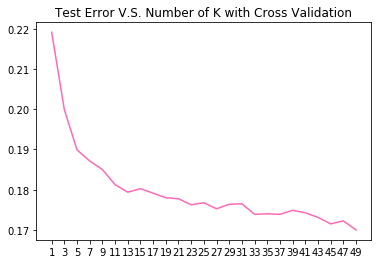

In [25]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE


# determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
x=["1","3","5","7","9","11","13","15","17","19","21","23","25","27","29","31","33","35","37","39","41","43","45","47","49"]

#mse=[MSE]

plt.plot( x,MSE, marker='',color='hotpink', label='x')
plt.title('Test Error V.S. Number of K with Cross Validation')

#plt.legend()

K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN- Enumerate with k-neighbors

In [22]:
#Set up arrays to store training and test accuracies
neighbors =np.arange (1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #set up knn with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #Fit the Model
    knn.fit(x_train2,y_train2)
    
    #compute accuracy on the training set
    train_accuracy[i]=knn.score(x_train2, y_train2)
    #Compute accuracy on the test set
    test_accuracy[i]=knn.score(x_test2, y_test2)

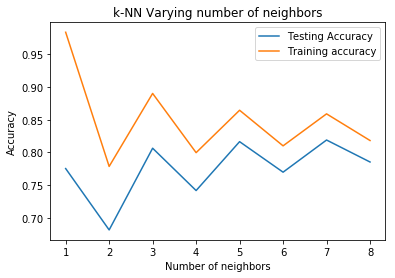

In [23]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Experiments with k Function

In [31]:
def knn(k,xtrain,ytrain,xtest,ytest):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    
    
    #Fit the model
    knn.fit(xtrain,ytrain)
    
    #prediction on train
    y_pred_train=knn.predict(xtrain)
    
    #prediction on test
    y_pred_test=knn.predict(xtest)
    
    #report performance
    print ("Accuracy of Train when k=",k)
    cal_accuracy(ytrain,y_pred_train)
    print ("Accuracy of Test when k=",k)
    cal_accuracy(ytest,y_pred_test)
    
    return y_pred_train,y_pred_test

In [32]:
random.seed(4)
#k=1
k_t_1,k_1=knn(1,x_train2,y_train2,x_test2,y_test2)

#k=5
k_t_5,k_5=knn(5,x_train2,y_train2,x_test2,y_test2)

#k=9
k_t_9,k_9=knn(9,x_train2,y_train2,x_test2,y_test2)

#k=13
k_t_13,k_13=knn(13,x_train2,y_train2,x_test2,y_test2)

Accuracy of Train when k= 1
Accuracy : 98.32499999999999
Error rate: 0.016750000000000043
Accuracy of Test when k= 1
Accuracy : 77.55
Error rate: 0.22450000000000003
Accuracy of Train when k= 5
Accuracy : 86.4375
Error rate: 0.135625
Accuracy of Test when k= 5
Accuracy : 81.65
Error rate: 0.1835
Accuracy of Train when k= 9
Accuracy : 85.3
Error rate: 0.14700000000000002
Accuracy of Test when k= 9
Accuracy : 82.6
Error rate: 0.17400000000000004
Accuracy of Train when k= 13
Accuracy : 84.875
Error rate: 0.15125
Accuracy of Test when k= 13
Accuracy : 82.5
Error rate: 0.17500000000000004


In [38]:
    print ("Accuracy of Train when k=1")
    k_t_1_e=cal_accuracy(y_train2,k_t_1)
    print ("Accuracy of Test when k=1")
    k_1_e=cal_accuracy(y_test2,k_1)
    
    #report performance
    print ("Accuracy of Train when k=5")
    k_t_5_e=cal_accuracy(y_train2,k_t_5)
    print ("Accuracy of Test when k=5")
    k_5_e=cal_accuracy(y_test2,k_5)
    
        #report performance
    print ("Accuracy of Train when k=9")
    k_t_9_e=cal_accuracy(y_train2,k_t_9)
    print ("Accuracy of Test when k=9")
    k_9_e=cal_accuracy(y_test2,k_9)
    
        #report performance
    print ("Accuracy of Train when k=13")
    k_t_13_e=cal_accuracy(y_train2,k_t_13)
    print ("Accuracy of Test when k=13")
    k_13_e=cal_accuracy(y_test2,k_13)

Accuracy of Train when k=1
Accuracy : 98.32499999999999
Error rate: 0.016750000000000043
Accuracy of Test when k=1
Accuracy : 77.55
Error rate: 0.22450000000000003
Accuracy of Train when k=5
Accuracy : 86.4375
Error rate: 0.135625
Accuracy of Test when k=5
Accuracy : 81.65
Error rate: 0.1835
Accuracy of Train when k=9
Accuracy : 85.3
Error rate: 0.14700000000000002
Accuracy of Test when k=9
Accuracy : 82.6
Error rate: 0.17400000000000004
Accuracy of Train when k=13
Accuracy : 84.875
Error rate: 0.15125
Accuracy of Test when k=13
Accuracy : 82.5
Error rate: 0.17500000000000004


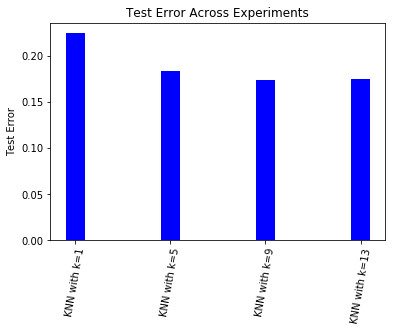

In [39]:
#Bar Chart of Test Error

objects = ("KNN with k=1","KNN with k=5","KNN with k=9"," KNN with k=13")
y_pos = [0, 2, 4, 6]
performance = [k_1_e, k_5_e, k_9_e,k_13_e]

plt.bar(y_pos, performance, width=0.4,alpha=1,color='blue')
plt.xticks(y_pos, objects,rotation=80)

plt.ylabel('Test Error')
plt.title('Test Error Across Experiments')
 
plt.show()

Plot

Learning Curve of number of layers

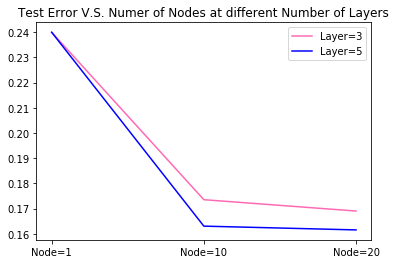

In [26]:
#Layer learning curve

x=["Node=1","Node=10","Node=20"]

Layer_3=[ann_1_e,ann_10_e,ann_20_e]
Layer_5=[ann_1_5l_e,ann_10_5l_e,ann_20_5l_e]
plt.plot( x, Layer_3, marker='',color='hotpink', label='Layer=3')
plt.plot( x, Layer_5, marker='', color='blue', label='Layer=5')
plt.title('Test Error V.S. Numer of Nodes at different Number of Layers')

plt.legend()

Comparison with different activation functions

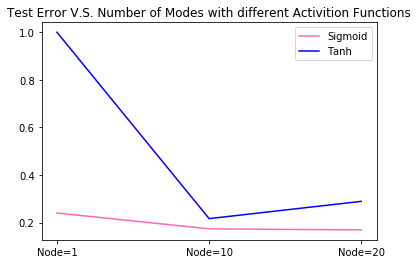

In [27]:
#learning Rate of activiation functions

x=["Node=1","Node=10","Node=20"]

Sigmoid=[ann_1_e,ann_10_e,ann_20_e]
Tanh=[ann_1_tanh_e,ann_10_tanh_e,ann_20_tanh_e]
plt.plot( x, Sigmoid, marker='',color='hotpink',label='Sigmoid')
plt.plot( x, Tanh, marker='', color='blue', label='Tanh')
plt.title('Test Error V.S. Number of Modes with different Activition Functions')

plt.legend()

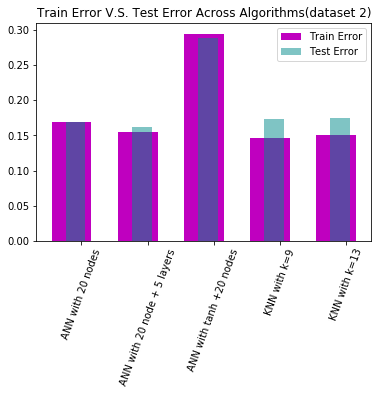

In [40]:
width = 0.6

trainerror   = [ann_t_20_e,ann_t_20_5l_e,ann_t_20_tanh_e, k_t_9_e,k_t_13_e]
testerror    = [ann_20_e,ann_20_5l_e,ann_20_tanh_e, k_9_e,k_13_e]

indices = np.arange(len(trainerror))

plt.bar(indices, trainerror, width=width, 
        color='m', label='Train Error')
plt.bar([i+0.1*width for i in indices], testerror, 
        width=0.5*width, color='darkcyan', alpha=0.5, label='Test Error')

objects = ('ANN with 20 nodes', 'ANN with 20 node + 5 layers',"ANN with tanh +20 nodes","KNN with k=9"," KNN with k=13")
plt.xticks(indices+width/4, 
           objects,rotation=70 )

plt.title('Train Error V.S. Test Error Across Algorithms(dataset 2)')

plt.legend()

plt.show()

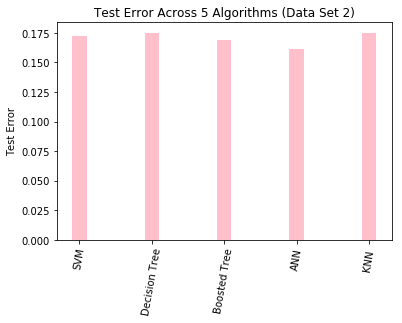

In [42]:
#ranking of 5 algorithms

objects = ('SVM', 'Decision Tree',"Boosted Tree","ANN"," KNN ")
y_pos = [0, 2, 4, 6,8]
performance = [0.1725,0.1745,0.16900000000000004, ann_20_5l_e,k_13_e]

plt.bar(y_pos, performance, width=0.4,alpha=1,color='pink')
plt.xticks(y_pos, objects,rotation=80)

plt.ylabel('Test Error')
plt.title('Test Error Across 5 Algorithms (Data Set 2)')
 
plt.show()